In [85]:
#@title Import libraries
import cv2
from matplotlib import pyplot
from matplotlib.image import imread
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Visualizing

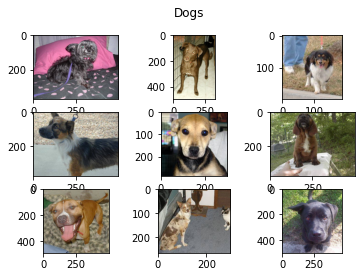

In [2]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'data/Petimages/'
# plot first few images
pyplot.suptitle('Dogs')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Dog/dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

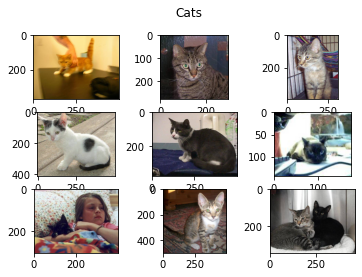

In [3]:
# plot dog photos from the dogs vs cats dataset
# plot first few images
pyplot.suptitle('Cats')
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Cat/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# credit to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

we can see that we have uneven picture shape so we should do resizing to images

In [4]:
images_cat = []
images_dog = []
for i in range(0,12499):
    image = cv2.imread(folder + 'Cat/cat.' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (40,40))
    image = np.array(image)
    images_cat.append(image)
    image = cv2.imread(folder + 'Dog/dog.' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(40,40))
    image = np.array(image)
    images_dog.append(image)  
    print(image.shape, i)

(40, 40) 0
(40, 40) 1
(40, 40) 2
(40, 40) 3
(40, 40) 4
(40, 40) 5
(40, 40) 6
(40, 40) 7
(40, 40) 8
(40, 40) 9
(40, 40) 10
(40, 40) 11
(40, 40) 12
(40, 40) 13
(40, 40) 14
(40, 40) 15
(40, 40) 16
(40, 40) 17
(40, 40) 18
(40, 40) 19
(40, 40) 20
(40, 40) 21
(40, 40) 22
(40, 40) 23
(40, 40) 24
(40, 40) 25
(40, 40) 26
(40, 40) 27
(40, 40) 28
(40, 40) 29
(40, 40) 30
(40, 40) 31
(40, 40) 32
(40, 40) 33
(40, 40) 34
(40, 40) 35
(40, 40) 36
(40, 40) 37
(40, 40) 38
(40, 40) 39
(40, 40) 40
(40, 40) 41
(40, 40) 42
(40, 40) 43
(40, 40) 44
(40, 40) 45
(40, 40) 46
(40, 40) 47
(40, 40) 48
(40, 40) 49
(40, 40) 50
(40, 40) 51
(40, 40) 52
(40, 40) 53
(40, 40) 54
(40, 40) 55
(40, 40) 56
(40, 40) 57
(40, 40) 58
(40, 40) 59
(40, 40) 60
(40, 40) 61
(40, 40) 62
(40, 40) 63
(40, 40) 64
(40, 40) 65
(40, 40) 66
(40, 40) 67
(40, 40) 68
(40, 40) 69
(40, 40) 70
(40, 40) 71
(40, 40) 72
(40, 40) 73
(40, 40) 74
(40, 40) 75
(40, 40) 76
(40, 40) 77
(40, 40) 78
(40, 40) 79
(40, 40) 80
(40, 40) 81
(40, 40) 82
(40, 40) 83
(4

(40, 40) 646
(40, 40) 647
(40, 40) 648
(40, 40) 649
(40, 40) 650
(40, 40) 651
(40, 40) 652
(40, 40) 653
(40, 40) 654
(40, 40) 655
(40, 40) 656
(40, 40) 657
(40, 40) 658
(40, 40) 659
(40, 40) 660
(40, 40) 661
(40, 40) 662
(40, 40) 663
(40, 40) 664
(40, 40) 665
(40, 40) 666
(40, 40) 667
(40, 40) 668
(40, 40) 669
(40, 40) 670
(40, 40) 671
(40, 40) 672
(40, 40) 673
(40, 40) 674
(40, 40) 675
(40, 40) 676
(40, 40) 677
(40, 40) 678
(40, 40) 679
(40, 40) 680
(40, 40) 681
(40, 40) 682
(40, 40) 683
(40, 40) 684
(40, 40) 685
(40, 40) 686
(40, 40) 687
(40, 40) 688
(40, 40) 689
(40, 40) 690
(40, 40) 691
(40, 40) 692
(40, 40) 693
(40, 40) 694
(40, 40) 695
(40, 40) 696
(40, 40) 697
(40, 40) 698
(40, 40) 699
(40, 40) 700
(40, 40) 701
(40, 40) 702
(40, 40) 703
(40, 40) 704
(40, 40) 705
(40, 40) 706
(40, 40) 707
(40, 40) 708
(40, 40) 709
(40, 40) 710
(40, 40) 711
(40, 40) 712
(40, 40) 713
(40, 40) 714
(40, 40) 715
(40, 40) 716
(40, 40) 717
(40, 40) 718
(40, 40) 719
(40, 40) 720
(40, 40) 721
(40, 40) 722

(40, 40) 1256
(40, 40) 1257
(40, 40) 1258
(40, 40) 1259
(40, 40) 1260
(40, 40) 1261
(40, 40) 1262
(40, 40) 1263
(40, 40) 1264
(40, 40) 1265
(40, 40) 1266
(40, 40) 1267
(40, 40) 1268
(40, 40) 1269
(40, 40) 1270
(40, 40) 1271
(40, 40) 1272
(40, 40) 1273
(40, 40) 1274
(40, 40) 1275
(40, 40) 1276
(40, 40) 1277
(40, 40) 1278
(40, 40) 1279
(40, 40) 1280
(40, 40) 1281
(40, 40) 1282
(40, 40) 1283
(40, 40) 1284
(40, 40) 1285
(40, 40) 1286
(40, 40) 1287
(40, 40) 1288
(40, 40) 1289
(40, 40) 1290
(40, 40) 1291
(40, 40) 1292
(40, 40) 1293
(40, 40) 1294
(40, 40) 1295
(40, 40) 1296
(40, 40) 1297
(40, 40) 1298
(40, 40) 1299
(40, 40) 1300
(40, 40) 1301
(40, 40) 1302
(40, 40) 1303
(40, 40) 1304
(40, 40) 1305
(40, 40) 1306
(40, 40) 1307
(40, 40) 1308
(40, 40) 1309
(40, 40) 1310
(40, 40) 1311
(40, 40) 1312
(40, 40) 1313
(40, 40) 1314
(40, 40) 1315
(40, 40) 1316
(40, 40) 1317
(40, 40) 1318
(40, 40) 1319
(40, 40) 1320
(40, 40) 1321
(40, 40) 1322
(40, 40) 1323
(40, 40) 1324
(40, 40) 1325
(40, 40) 1326
(40, 4

(40, 40) 1842
(40, 40) 1843
(40, 40) 1844
(40, 40) 1845
(40, 40) 1846
(40, 40) 1847
(40, 40) 1848
(40, 40) 1849
(40, 40) 1850
(40, 40) 1851
(40, 40) 1852
(40, 40) 1853
(40, 40) 1854
(40, 40) 1855
(40, 40) 1856
(40, 40) 1857
(40, 40) 1858
(40, 40) 1859
(40, 40) 1860
(40, 40) 1861
(40, 40) 1862
(40, 40) 1863
(40, 40) 1864
(40, 40) 1865
(40, 40) 1866
(40, 40) 1867
(40, 40) 1868
(40, 40) 1869
(40, 40) 1870
(40, 40) 1871
(40, 40) 1872
(40, 40) 1873
(40, 40) 1874
(40, 40) 1875
(40, 40) 1876
(40, 40) 1877
(40, 40) 1878
(40, 40) 1879
(40, 40) 1880
(40, 40) 1881
(40, 40) 1882
(40, 40) 1883
(40, 40) 1884
(40, 40) 1885
(40, 40) 1886
(40, 40) 1887
(40, 40) 1888
(40, 40) 1889
(40, 40) 1890
(40, 40) 1891
(40, 40) 1892
(40, 40) 1893
(40, 40) 1894
(40, 40) 1895
(40, 40) 1896
(40, 40) 1897
(40, 40) 1898
(40, 40) 1899
(40, 40) 1900
(40, 40) 1901
(40, 40) 1902
(40, 40) 1903
(40, 40) 1904
(40, 40) 1905
(40, 40) 1906
(40, 40) 1907
(40, 40) 1908
(40, 40) 1909
(40, 40) 1910
(40, 40) 1911
(40, 40) 1912
(40, 4

(40, 40) 2434
(40, 40) 2435
(40, 40) 2436
(40, 40) 2437
(40, 40) 2438
(40, 40) 2439
(40, 40) 2440
(40, 40) 2441
(40, 40) 2442
(40, 40) 2443
(40, 40) 2444
(40, 40) 2445
(40, 40) 2446
(40, 40) 2447
(40, 40) 2448
(40, 40) 2449
(40, 40) 2450
(40, 40) 2451
(40, 40) 2452
(40, 40) 2453
(40, 40) 2454
(40, 40) 2455
(40, 40) 2456
(40, 40) 2457
(40, 40) 2458
(40, 40) 2459
(40, 40) 2460
(40, 40) 2461
(40, 40) 2462
(40, 40) 2463
(40, 40) 2464
(40, 40) 2465
(40, 40) 2466
(40, 40) 2467
(40, 40) 2468
(40, 40) 2469
(40, 40) 2470
(40, 40) 2471
(40, 40) 2472
(40, 40) 2473
(40, 40) 2474
(40, 40) 2475
(40, 40) 2476
(40, 40) 2477
(40, 40) 2478
(40, 40) 2479
(40, 40) 2480
(40, 40) 2481
(40, 40) 2482
(40, 40) 2483
(40, 40) 2484
(40, 40) 2485
(40, 40) 2486
(40, 40) 2487
(40, 40) 2488
(40, 40) 2489
(40, 40) 2490
(40, 40) 2491
(40, 40) 2492
(40, 40) 2493
(40, 40) 2494
(40, 40) 2495
(40, 40) 2496
(40, 40) 2497
(40, 40) 2498
(40, 40) 2499
(40, 40) 2500
(40, 40) 2501
(40, 40) 2502
(40, 40) 2503
(40, 40) 2504
(40, 4

(40, 40) 3021
(40, 40) 3022
(40, 40) 3023
(40, 40) 3024
(40, 40) 3025
(40, 40) 3026
(40, 40) 3027
(40, 40) 3028
(40, 40) 3029
(40, 40) 3030
(40, 40) 3031
(40, 40) 3032
(40, 40) 3033
(40, 40) 3034
(40, 40) 3035
(40, 40) 3036
(40, 40) 3037
(40, 40) 3038
(40, 40) 3039
(40, 40) 3040
(40, 40) 3041
(40, 40) 3042
(40, 40) 3043
(40, 40) 3044
(40, 40) 3045
(40, 40) 3046
(40, 40) 3047
(40, 40) 3048
(40, 40) 3049
(40, 40) 3050
(40, 40) 3051
(40, 40) 3052
(40, 40) 3053
(40, 40) 3054
(40, 40) 3055
(40, 40) 3056
(40, 40) 3057
(40, 40) 3058
(40, 40) 3059
(40, 40) 3060
(40, 40) 3061
(40, 40) 3062
(40, 40) 3063
(40, 40) 3064
(40, 40) 3065
(40, 40) 3066
(40, 40) 3067
(40, 40) 3068
(40, 40) 3069
(40, 40) 3070
(40, 40) 3071
(40, 40) 3072
(40, 40) 3073
(40, 40) 3074
(40, 40) 3075
(40, 40) 3076
(40, 40) 3077
(40, 40) 3078
(40, 40) 3079
(40, 40) 3080
(40, 40) 3081
(40, 40) 3082
(40, 40) 3083
(40, 40) 3084
(40, 40) 3085
(40, 40) 3086
(40, 40) 3087
(40, 40) 3088
(40, 40) 3089
(40, 40) 3090
(40, 40) 3091
(40, 4

(40, 40) 3609
(40, 40) 3610
(40, 40) 3611
(40, 40) 3612
(40, 40) 3613
(40, 40) 3614
(40, 40) 3615
(40, 40) 3616
(40, 40) 3617
(40, 40) 3618
(40, 40) 3619
(40, 40) 3620
(40, 40) 3621
(40, 40) 3622
(40, 40) 3623
(40, 40) 3624
(40, 40) 3625
(40, 40) 3626
(40, 40) 3627
(40, 40) 3628
(40, 40) 3629
(40, 40) 3630
(40, 40) 3631
(40, 40) 3632
(40, 40) 3633
(40, 40) 3634
(40, 40) 3635
(40, 40) 3636
(40, 40) 3637
(40, 40) 3638
(40, 40) 3639
(40, 40) 3640
(40, 40) 3641
(40, 40) 3642
(40, 40) 3643
(40, 40) 3644
(40, 40) 3645
(40, 40) 3646
(40, 40) 3647
(40, 40) 3648
(40, 40) 3649
(40, 40) 3650
(40, 40) 3651
(40, 40) 3652
(40, 40) 3653
(40, 40) 3654
(40, 40) 3655
(40, 40) 3656
(40, 40) 3657
(40, 40) 3658
(40, 40) 3659
(40, 40) 3660
(40, 40) 3661
(40, 40) 3662
(40, 40) 3663
(40, 40) 3664
(40, 40) 3665
(40, 40) 3666
(40, 40) 3667
(40, 40) 3668
(40, 40) 3669
(40, 40) 3670
(40, 40) 3671
(40, 40) 3672
(40, 40) 3673
(40, 40) 3674
(40, 40) 3675
(40, 40) 3676
(40, 40) 3677
(40, 40) 3678
(40, 40) 3679
(40, 4

(40, 40) 4195
(40, 40) 4196
(40, 40) 4197
(40, 40) 4198
(40, 40) 4199
(40, 40) 4200
(40, 40) 4201
(40, 40) 4202
(40, 40) 4203
(40, 40) 4204
(40, 40) 4205
(40, 40) 4206
(40, 40) 4207
(40, 40) 4208
(40, 40) 4209
(40, 40) 4210
(40, 40) 4211
(40, 40) 4212
(40, 40) 4213
(40, 40) 4214
(40, 40) 4215
(40, 40) 4216
(40, 40) 4217
(40, 40) 4218
(40, 40) 4219
(40, 40) 4220
(40, 40) 4221
(40, 40) 4222
(40, 40) 4223
(40, 40) 4224
(40, 40) 4225
(40, 40) 4226
(40, 40) 4227
(40, 40) 4228
(40, 40) 4229
(40, 40) 4230
(40, 40) 4231
(40, 40) 4232
(40, 40) 4233
(40, 40) 4234
(40, 40) 4235
(40, 40) 4236
(40, 40) 4237
(40, 40) 4238
(40, 40) 4239
(40, 40) 4240
(40, 40) 4241
(40, 40) 4242
(40, 40) 4243
(40, 40) 4244
(40, 40) 4245
(40, 40) 4246
(40, 40) 4247
(40, 40) 4248
(40, 40) 4249
(40, 40) 4250
(40, 40) 4251
(40, 40) 4252
(40, 40) 4253
(40, 40) 4254
(40, 40) 4255
(40, 40) 4256
(40, 40) 4257
(40, 40) 4258
(40, 40) 4259
(40, 40) 4260
(40, 40) 4261
(40, 40) 4262
(40, 40) 4263
(40, 40) 4264
(40, 40) 4265
(40, 4

(40, 40) 4784
(40, 40) 4785
(40, 40) 4786
(40, 40) 4787
(40, 40) 4788
(40, 40) 4789
(40, 40) 4790
(40, 40) 4791
(40, 40) 4792
(40, 40) 4793
(40, 40) 4794
(40, 40) 4795
(40, 40) 4796
(40, 40) 4797
(40, 40) 4798
(40, 40) 4799
(40, 40) 4800
(40, 40) 4801
(40, 40) 4802
(40, 40) 4803
(40, 40) 4804
(40, 40) 4805
(40, 40) 4806
(40, 40) 4807
(40, 40) 4808
(40, 40) 4809
(40, 40) 4810
(40, 40) 4811
(40, 40) 4812
(40, 40) 4813
(40, 40) 4814
(40, 40) 4815
(40, 40) 4816
(40, 40) 4817
(40, 40) 4818
(40, 40) 4819
(40, 40) 4820
(40, 40) 4821
(40, 40) 4822
(40, 40) 4823
(40, 40) 4824
(40, 40) 4825
(40, 40) 4826
(40, 40) 4827
(40, 40) 4828
(40, 40) 4829
(40, 40) 4830
(40, 40) 4831
(40, 40) 4832
(40, 40) 4833
(40, 40) 4834
(40, 40) 4835
(40, 40) 4836
(40, 40) 4837
(40, 40) 4838
(40, 40) 4839
(40, 40) 4840
(40, 40) 4841
(40, 40) 4842
(40, 40) 4843
(40, 40) 4844
(40, 40) 4845
(40, 40) 4846
(40, 40) 4847
(40, 40) 4848
(40, 40) 4849
(40, 40) 4850
(40, 40) 4851
(40, 40) 4852
(40, 40) 4853
(40, 40) 4854
(40, 4

(40, 40) 5376
(40, 40) 5377
(40, 40) 5378
(40, 40) 5379
(40, 40) 5380
(40, 40) 5381
(40, 40) 5382
(40, 40) 5383
(40, 40) 5384
(40, 40) 5385
(40, 40) 5386
(40, 40) 5387
(40, 40) 5388
(40, 40) 5389
(40, 40) 5390
(40, 40) 5391
(40, 40) 5392
(40, 40) 5393
(40, 40) 5394
(40, 40) 5395
(40, 40) 5396
(40, 40) 5397
(40, 40) 5398
(40, 40) 5399
(40, 40) 5400
(40, 40) 5401
(40, 40) 5402
(40, 40) 5403
(40, 40) 5404
(40, 40) 5405
(40, 40) 5406
(40, 40) 5407
(40, 40) 5408
(40, 40) 5409
(40, 40) 5410
(40, 40) 5411
(40, 40) 5412
(40, 40) 5413
(40, 40) 5414
(40, 40) 5415
(40, 40) 5416
(40, 40) 5417
(40, 40) 5418
(40, 40) 5419
(40, 40) 5420
(40, 40) 5421
(40, 40) 5422
(40, 40) 5423
(40, 40) 5424
(40, 40) 5425
(40, 40) 5426
(40, 40) 5427
(40, 40) 5428
(40, 40) 5429
(40, 40) 5430
(40, 40) 5431
(40, 40) 5432
(40, 40) 5433
(40, 40) 5434
(40, 40) 5435
(40, 40) 5436
(40, 40) 5437
(40, 40) 5438
(40, 40) 5439
(40, 40) 5440
(40, 40) 5441
(40, 40) 5442
(40, 40) 5443
(40, 40) 5444
(40, 40) 5445
(40, 40) 5446
(40, 4

(40, 40) 5962
(40, 40) 5963
(40, 40) 5964
(40, 40) 5965
(40, 40) 5966
(40, 40) 5967
(40, 40) 5968
(40, 40) 5969
(40, 40) 5970
(40, 40) 5971
(40, 40) 5972
(40, 40) 5973
(40, 40) 5974
(40, 40) 5975
(40, 40) 5976
(40, 40) 5977
(40, 40) 5978
(40, 40) 5979
(40, 40) 5980
(40, 40) 5981
(40, 40) 5982
(40, 40) 5983
(40, 40) 5984
(40, 40) 5985
(40, 40) 5986
(40, 40) 5987
(40, 40) 5988
(40, 40) 5989
(40, 40) 5990
(40, 40) 5991
(40, 40) 5992
(40, 40) 5993
(40, 40) 5994
(40, 40) 5995
(40, 40) 5996
(40, 40) 5997
(40, 40) 5998
(40, 40) 5999
(40, 40) 6000
(40, 40) 6001
(40, 40) 6002
(40, 40) 6003
(40, 40) 6004
(40, 40) 6005
(40, 40) 6006
(40, 40) 6007
(40, 40) 6008
(40, 40) 6009
(40, 40) 6010
(40, 40) 6011
(40, 40) 6012
(40, 40) 6013
(40, 40) 6014
(40, 40) 6015
(40, 40) 6016
(40, 40) 6017
(40, 40) 6018
(40, 40) 6019
(40, 40) 6020
(40, 40) 6021
(40, 40) 6022
(40, 40) 6023
(40, 40) 6024
(40, 40) 6025
(40, 40) 6026
(40, 40) 6027
(40, 40) 6028
(40, 40) 6029
(40, 40) 6030
(40, 40) 6031
(40, 40) 6032
(40, 4

(40, 40) 6554
(40, 40) 6555
(40, 40) 6556
(40, 40) 6557
(40, 40) 6558
(40, 40) 6559
(40, 40) 6560
(40, 40) 6561
(40, 40) 6562
(40, 40) 6563
(40, 40) 6564
(40, 40) 6565
(40, 40) 6566
(40, 40) 6567
(40, 40) 6568
(40, 40) 6569
(40, 40) 6570
(40, 40) 6571
(40, 40) 6572
(40, 40) 6573
(40, 40) 6574
(40, 40) 6575
(40, 40) 6576
(40, 40) 6577
(40, 40) 6578
(40, 40) 6579
(40, 40) 6580
(40, 40) 6581
(40, 40) 6582
(40, 40) 6583
(40, 40) 6584
(40, 40) 6585
(40, 40) 6586
(40, 40) 6587
(40, 40) 6588
(40, 40) 6589
(40, 40) 6590
(40, 40) 6591
(40, 40) 6592
(40, 40) 6593
(40, 40) 6594
(40, 40) 6595
(40, 40) 6596
(40, 40) 6597
(40, 40) 6598
(40, 40) 6599
(40, 40) 6600
(40, 40) 6601
(40, 40) 6602
(40, 40) 6603
(40, 40) 6604
(40, 40) 6605
(40, 40) 6606
(40, 40) 6607
(40, 40) 6608
(40, 40) 6609
(40, 40) 6610
(40, 40) 6611
(40, 40) 6612
(40, 40) 6613
(40, 40) 6614
(40, 40) 6615
(40, 40) 6616
(40, 40) 6617
(40, 40) 6618
(40, 40) 6619
(40, 40) 6620
(40, 40) 6621
(40, 40) 6622
(40, 40) 6623
(40, 40) 6624
(40, 4

(40, 40) 7144
(40, 40) 7145
(40, 40) 7146
(40, 40) 7147
(40, 40) 7148
(40, 40) 7149
(40, 40) 7150
(40, 40) 7151
(40, 40) 7152
(40, 40) 7153
(40, 40) 7154
(40, 40) 7155
(40, 40) 7156
(40, 40) 7157
(40, 40) 7158
(40, 40) 7159
(40, 40) 7160
(40, 40) 7161
(40, 40) 7162
(40, 40) 7163
(40, 40) 7164
(40, 40) 7165
(40, 40) 7166
(40, 40) 7167
(40, 40) 7168
(40, 40) 7169
(40, 40) 7170
(40, 40) 7171
(40, 40) 7172
(40, 40) 7173
(40, 40) 7174
(40, 40) 7175
(40, 40) 7176
(40, 40) 7177
(40, 40) 7178
(40, 40) 7179
(40, 40) 7180
(40, 40) 7181
(40, 40) 7182
(40, 40) 7183
(40, 40) 7184
(40, 40) 7185
(40, 40) 7186
(40, 40) 7187
(40, 40) 7188
(40, 40) 7189
(40, 40) 7190
(40, 40) 7191
(40, 40) 7192
(40, 40) 7193
(40, 40) 7194
(40, 40) 7195
(40, 40) 7196
(40, 40) 7197
(40, 40) 7198
(40, 40) 7199
(40, 40) 7200
(40, 40) 7201
(40, 40) 7202
(40, 40) 7203
(40, 40) 7204
(40, 40) 7205
(40, 40) 7206
(40, 40) 7207
(40, 40) 7208
(40, 40) 7209
(40, 40) 7210
(40, 40) 7211
(40, 40) 7212
(40, 40) 7213
(40, 40) 7214
(40, 4

(40, 40) 7736
(40, 40) 7737
(40, 40) 7738
(40, 40) 7739
(40, 40) 7740
(40, 40) 7741
(40, 40) 7742
(40, 40) 7743
(40, 40) 7744
(40, 40) 7745
(40, 40) 7746
(40, 40) 7747
(40, 40) 7748
(40, 40) 7749
(40, 40) 7750
(40, 40) 7751
(40, 40) 7752
(40, 40) 7753
(40, 40) 7754
(40, 40) 7755
(40, 40) 7756
(40, 40) 7757
(40, 40) 7758
(40, 40) 7759
(40, 40) 7760
(40, 40) 7761
(40, 40) 7762
(40, 40) 7763
(40, 40) 7764
(40, 40) 7765
(40, 40) 7766
(40, 40) 7767
(40, 40) 7768
(40, 40) 7769
(40, 40) 7770
(40, 40) 7771
(40, 40) 7772
(40, 40) 7773
(40, 40) 7774
(40, 40) 7775
(40, 40) 7776
(40, 40) 7777
(40, 40) 7778
(40, 40) 7779
(40, 40) 7780
(40, 40) 7781
(40, 40) 7782
(40, 40) 7783
(40, 40) 7784
(40, 40) 7785
(40, 40) 7786
(40, 40) 7787
(40, 40) 7788
(40, 40) 7789
(40, 40) 7790
(40, 40) 7791
(40, 40) 7792
(40, 40) 7793
(40, 40) 7794
(40, 40) 7795
(40, 40) 7796
(40, 40) 7797
(40, 40) 7798
(40, 40) 7799
(40, 40) 7800
(40, 40) 7801
(40, 40) 7802
(40, 40) 7803
(40, 40) 7804
(40, 40) 7805
(40, 40) 7806
(40, 4

(40, 40) 8322
(40, 40) 8323
(40, 40) 8324
(40, 40) 8325
(40, 40) 8326
(40, 40) 8327
(40, 40) 8328
(40, 40) 8329
(40, 40) 8330
(40, 40) 8331
(40, 40) 8332
(40, 40) 8333
(40, 40) 8334
(40, 40) 8335
(40, 40) 8336
(40, 40) 8337
(40, 40) 8338
(40, 40) 8339
(40, 40) 8340
(40, 40) 8341
(40, 40) 8342
(40, 40) 8343
(40, 40) 8344
(40, 40) 8345
(40, 40) 8346
(40, 40) 8347
(40, 40) 8348
(40, 40) 8349
(40, 40) 8350
(40, 40) 8351
(40, 40) 8352
(40, 40) 8353
(40, 40) 8354
(40, 40) 8355
(40, 40) 8356
(40, 40) 8357
(40, 40) 8358
(40, 40) 8359
(40, 40) 8360
(40, 40) 8361
(40, 40) 8362
(40, 40) 8363
(40, 40) 8364
(40, 40) 8365
(40, 40) 8366
(40, 40) 8367
(40, 40) 8368
(40, 40) 8369
(40, 40) 8370
(40, 40) 8371
(40, 40) 8372
(40, 40) 8373
(40, 40) 8374
(40, 40) 8375
(40, 40) 8376
(40, 40) 8377
(40, 40) 8378
(40, 40) 8379
(40, 40) 8380
(40, 40) 8381
(40, 40) 8382
(40, 40) 8383
(40, 40) 8384
(40, 40) 8385
(40, 40) 8386
(40, 40) 8387
(40, 40) 8388
(40, 40) 8389
(40, 40) 8390
(40, 40) 8391
(40, 40) 8392
(40, 4

(40, 40) 8909
(40, 40) 8910
(40, 40) 8911
(40, 40) 8912
(40, 40) 8913
(40, 40) 8914
(40, 40) 8915
(40, 40) 8916
(40, 40) 8917
(40, 40) 8918
(40, 40) 8919
(40, 40) 8920
(40, 40) 8921
(40, 40) 8922
(40, 40) 8923
(40, 40) 8924
(40, 40) 8925
(40, 40) 8926
(40, 40) 8927
(40, 40) 8928
(40, 40) 8929
(40, 40) 8930
(40, 40) 8931
(40, 40) 8932
(40, 40) 8933
(40, 40) 8934
(40, 40) 8935
(40, 40) 8936
(40, 40) 8937
(40, 40) 8938
(40, 40) 8939
(40, 40) 8940
(40, 40) 8941
(40, 40) 8942
(40, 40) 8943
(40, 40) 8944
(40, 40) 8945
(40, 40) 8946
(40, 40) 8947
(40, 40) 8948
(40, 40) 8949
(40, 40) 8950
(40, 40) 8951
(40, 40) 8952
(40, 40) 8953
(40, 40) 8954
(40, 40) 8955
(40, 40) 8956
(40, 40) 8957
(40, 40) 8958
(40, 40) 8959
(40, 40) 8960
(40, 40) 8961
(40, 40) 8962
(40, 40) 8963
(40, 40) 8964
(40, 40) 8965
(40, 40) 8966
(40, 40) 8967
(40, 40) 8968
(40, 40) 8969
(40, 40) 8970
(40, 40) 8971
(40, 40) 8972
(40, 40) 8973
(40, 40) 8974
(40, 40) 8975
(40, 40) 8976
(40, 40) 8977
(40, 40) 8978
(40, 40) 8979
(40, 4

(40, 40) 9497
(40, 40) 9498
(40, 40) 9499
(40, 40) 9500
(40, 40) 9501
(40, 40) 9502
(40, 40) 9503
(40, 40) 9504
(40, 40) 9505
(40, 40) 9506
(40, 40) 9507
(40, 40) 9508
(40, 40) 9509
(40, 40) 9510
(40, 40) 9511
(40, 40) 9512
(40, 40) 9513
(40, 40) 9514
(40, 40) 9515
(40, 40) 9516
(40, 40) 9517
(40, 40) 9518
(40, 40) 9519
(40, 40) 9520
(40, 40) 9521
(40, 40) 9522
(40, 40) 9523
(40, 40) 9524
(40, 40) 9525
(40, 40) 9526
(40, 40) 9527
(40, 40) 9528
(40, 40) 9529
(40, 40) 9530
(40, 40) 9531
(40, 40) 9532
(40, 40) 9533
(40, 40) 9534
(40, 40) 9535
(40, 40) 9536
(40, 40) 9537
(40, 40) 9538
(40, 40) 9539
(40, 40) 9540
(40, 40) 9541
(40, 40) 9542
(40, 40) 9543
(40, 40) 9544
(40, 40) 9545
(40, 40) 9546
(40, 40) 9547
(40, 40) 9548
(40, 40) 9549
(40, 40) 9550
(40, 40) 9551
(40, 40) 9552
(40, 40) 9553
(40, 40) 9554
(40, 40) 9555
(40, 40) 9556
(40, 40) 9557
(40, 40) 9558
(40, 40) 9559
(40, 40) 9560
(40, 40) 9561
(40, 40) 9562
(40, 40) 9563
(40, 40) 9564
(40, 40) 9565
(40, 40) 9566
(40, 40) 9567
(40, 4

(40, 40) 10086
(40, 40) 10087
(40, 40) 10088
(40, 40) 10089
(40, 40) 10090
(40, 40) 10091
(40, 40) 10092
(40, 40) 10093
(40, 40) 10094
(40, 40) 10095
(40, 40) 10096
(40, 40) 10097
(40, 40) 10098
(40, 40) 10099
(40, 40) 10100
(40, 40) 10101
(40, 40) 10102
(40, 40) 10103
(40, 40) 10104
(40, 40) 10105
(40, 40) 10106
(40, 40) 10107
(40, 40) 10108
(40, 40) 10109
(40, 40) 10110
(40, 40) 10111
(40, 40) 10112
(40, 40) 10113
(40, 40) 10114
(40, 40) 10115
(40, 40) 10116
(40, 40) 10117
(40, 40) 10118
(40, 40) 10119
(40, 40) 10120
(40, 40) 10121
(40, 40) 10122
(40, 40) 10123
(40, 40) 10124
(40, 40) 10125
(40, 40) 10126
(40, 40) 10127
(40, 40) 10128
(40, 40) 10129
(40, 40) 10130
(40, 40) 10131
(40, 40) 10132
(40, 40) 10133
(40, 40) 10134
(40, 40) 10135
(40, 40) 10136
(40, 40) 10137
(40, 40) 10138
(40, 40) 10139
(40, 40) 10140
(40, 40) 10141
(40, 40) 10142
(40, 40) 10143
(40, 40) 10144
(40, 40) 10145
(40, 40) 10146
(40, 40) 10147
(40, 40) 10148
(40, 40) 10149
(40, 40) 10150
(40, 40) 10151
(40, 40) 1

(40, 40) 10636
(40, 40) 10637
(40, 40) 10638
(40, 40) 10639
(40, 40) 10640
(40, 40) 10641
(40, 40) 10642
(40, 40) 10643
(40, 40) 10644
(40, 40) 10645
(40, 40) 10646
(40, 40) 10647
(40, 40) 10648
(40, 40) 10649
(40, 40) 10650
(40, 40) 10651
(40, 40) 10652
(40, 40) 10653
(40, 40) 10654
(40, 40) 10655
(40, 40) 10656
(40, 40) 10657
(40, 40) 10658
(40, 40) 10659
(40, 40) 10660
(40, 40) 10661
(40, 40) 10662
(40, 40) 10663
(40, 40) 10664
(40, 40) 10665
(40, 40) 10666
(40, 40) 10667
(40, 40) 10668
(40, 40) 10669
(40, 40) 10670
(40, 40) 10671
(40, 40) 10672
(40, 40) 10673
(40, 40) 10674
(40, 40) 10675
(40, 40) 10676
(40, 40) 10677
(40, 40) 10678
(40, 40) 10679
(40, 40) 10680
(40, 40) 10681
(40, 40) 10682
(40, 40) 10683
(40, 40) 10684
(40, 40) 10685
(40, 40) 10686
(40, 40) 10687
(40, 40) 10688
(40, 40) 10689
(40, 40) 10690
(40, 40) 10691
(40, 40) 10692
(40, 40) 10693
(40, 40) 10694
(40, 40) 10695
(40, 40) 10696
(40, 40) 10697
(40, 40) 10698
(40, 40) 10699
(40, 40) 10700
(40, 40) 10701
(40, 40) 1

(40, 40) 11183
(40, 40) 11184
(40, 40) 11185
(40, 40) 11186
(40, 40) 11187
(40, 40) 11188
(40, 40) 11189
(40, 40) 11190
(40, 40) 11191
(40, 40) 11192
(40, 40) 11193
(40, 40) 11194
(40, 40) 11195
(40, 40) 11196
(40, 40) 11197
(40, 40) 11198
(40, 40) 11199
(40, 40) 11200
(40, 40) 11201
(40, 40) 11202
(40, 40) 11203
(40, 40) 11204
(40, 40) 11205
(40, 40) 11206
(40, 40) 11207
(40, 40) 11208
(40, 40) 11209
(40, 40) 11210
(40, 40) 11211
(40, 40) 11212
(40, 40) 11213
(40, 40) 11214
(40, 40) 11215
(40, 40) 11216
(40, 40) 11217
(40, 40) 11218
(40, 40) 11219
(40, 40) 11220
(40, 40) 11221
(40, 40) 11222
(40, 40) 11223
(40, 40) 11224
(40, 40) 11225
(40, 40) 11226
(40, 40) 11227
(40, 40) 11228
(40, 40) 11229
(40, 40) 11230
(40, 40) 11231
(40, 40) 11232
(40, 40) 11233
(40, 40) 11234
(40, 40) 11235
(40, 40) 11236
(40, 40) 11237
(40, 40) 11238
(40, 40) 11239
(40, 40) 11240
(40, 40) 11241
(40, 40) 11242
(40, 40) 11243
(40, 40) 11244
(40, 40) 11245
(40, 40) 11246
(40, 40) 11247
(40, 40) 11248
(40, 40) 1

(40, 40) 11730
(40, 40) 11731
(40, 40) 11732
(40, 40) 11733
(40, 40) 11734
(40, 40) 11735
(40, 40) 11736
(40, 40) 11737
(40, 40) 11738
(40, 40) 11739
(40, 40) 11740
(40, 40) 11741
(40, 40) 11742
(40, 40) 11743
(40, 40) 11744
(40, 40) 11745
(40, 40) 11746
(40, 40) 11747
(40, 40) 11748
(40, 40) 11749
(40, 40) 11750
(40, 40) 11751
(40, 40) 11752
(40, 40) 11753
(40, 40) 11754
(40, 40) 11755
(40, 40) 11756
(40, 40) 11757
(40, 40) 11758
(40, 40) 11759
(40, 40) 11760
(40, 40) 11761
(40, 40) 11762
(40, 40) 11763
(40, 40) 11764
(40, 40) 11765
(40, 40) 11766
(40, 40) 11767
(40, 40) 11768
(40, 40) 11769
(40, 40) 11770
(40, 40) 11771
(40, 40) 11772
(40, 40) 11773
(40, 40) 11774
(40, 40) 11775
(40, 40) 11776
(40, 40) 11777
(40, 40) 11778
(40, 40) 11779
(40, 40) 11780
(40, 40) 11781
(40, 40) 11782
(40, 40) 11783
(40, 40) 11784
(40, 40) 11785
(40, 40) 11786
(40, 40) 11787
(40, 40) 11788
(40, 40) 11789
(40, 40) 11790
(40, 40) 11791
(40, 40) 11792
(40, 40) 11793
(40, 40) 11794
(40, 40) 11795
(40, 40) 1

(40, 40) 12282
(40, 40) 12283
(40, 40) 12284
(40, 40) 12285
(40, 40) 12286
(40, 40) 12287
(40, 40) 12288
(40, 40) 12289
(40, 40) 12290
(40, 40) 12291
(40, 40) 12292
(40, 40) 12293
(40, 40) 12294
(40, 40) 12295
(40, 40) 12296
(40, 40) 12297
(40, 40) 12298
(40, 40) 12299
(40, 40) 12300
(40, 40) 12301
(40, 40) 12302
(40, 40) 12303
(40, 40) 12304
(40, 40) 12305
(40, 40) 12306
(40, 40) 12307
(40, 40) 12308
(40, 40) 12309
(40, 40) 12310
(40, 40) 12311
(40, 40) 12312
(40, 40) 12313
(40, 40) 12314
(40, 40) 12315
(40, 40) 12316
(40, 40) 12317
(40, 40) 12318
(40, 40) 12319
(40, 40) 12320
(40, 40) 12321
(40, 40) 12322
(40, 40) 12323
(40, 40) 12324
(40, 40) 12325
(40, 40) 12326
(40, 40) 12327
(40, 40) 12328
(40, 40) 12329
(40, 40) 12330
(40, 40) 12331
(40, 40) 12332
(40, 40) 12333
(40, 40) 12334
(40, 40) 12335
(40, 40) 12336
(40, 40) 12337
(40, 40) 12338
(40, 40) 12339
(40, 40) 12340
(40, 40) 12341
(40, 40) 12342
(40, 40) 12343
(40, 40) 12344
(40, 40) 12345
(40, 40) 12346
(40, 40) 12347
(40, 40) 1

<Figure size 432x288 with 0 Axes>

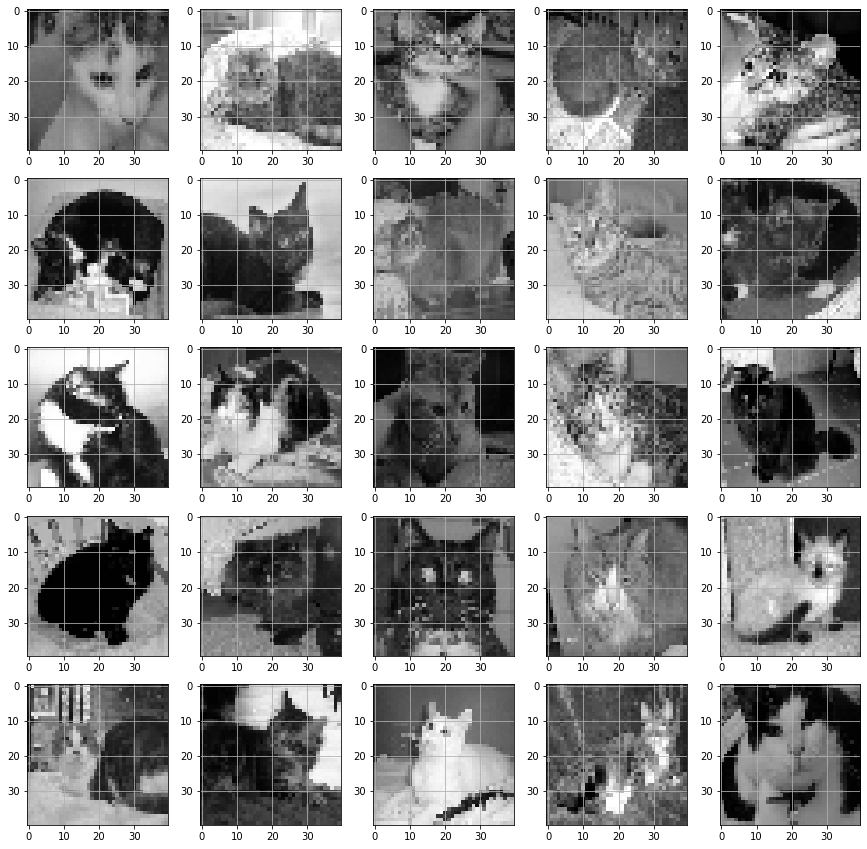

In [5]:
import matplotlib.pyplot as plt
images_cat = np.array(images_cat)
plt.figure()
plt.figure(figsize=(15,15))
for i in range(25):
  rand_no = np.random.randint(0,len(images_cat))
  plt.subplot(5,5,i+1)  
  plt.imshow(images_cat[rand_no], cmap='gray', vmin=0, vmax=255)
  plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

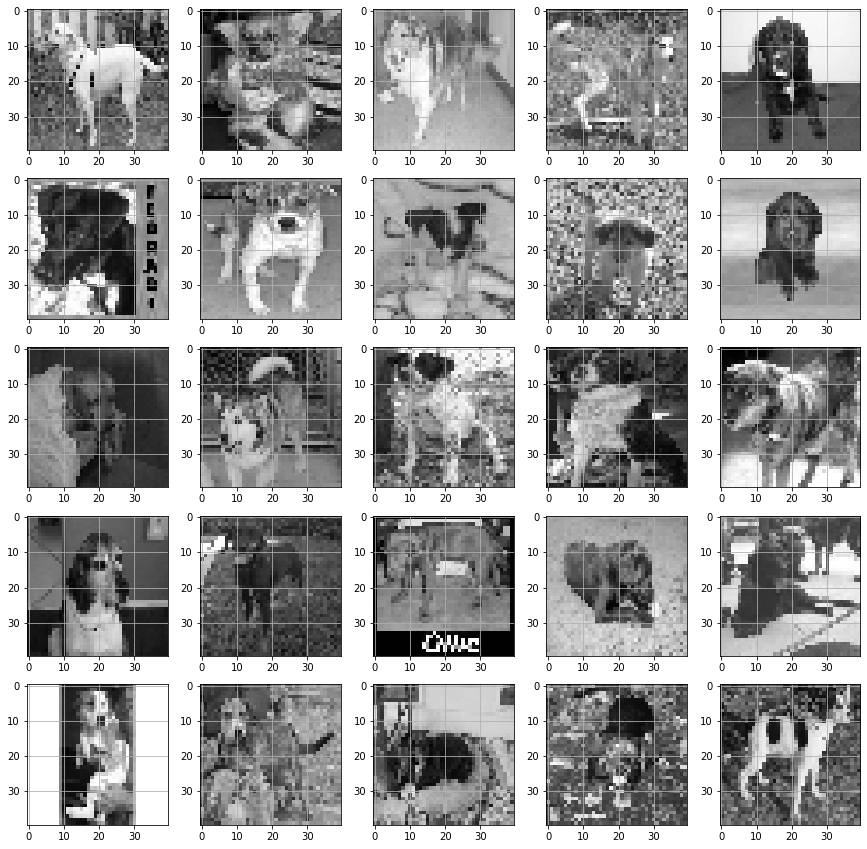

In [6]:
images_dog = np.array(images_dog)
plt.figure()
plt.figure(figsize=(15,15))
for i in range(25):
  rand_no = np.random.randint(0,len(images_dog))
  plt.subplot(5,5,i+1)  
  plt.imshow(images_dog[rand_no], cmap='gray', vmin=0, vmax=255)
  plt.grid(True)
plt.show()

# Data Preprocessing

In [20]:
#reshape data
images_cats = images_cat.reshape(images_cat.shape[0], 1600)
images_cats = pd.DataFrame(images_cats)
images_dogs = images_dog.reshape(images_cat.shape[0], 1600)
images_dogs = pd.DataFrame(images_dogs)

In [21]:
#add labels
images_cats[1600] = 0
images_dogs[1600] = 1
data = pd.concat((images_cats, images_dogs))

In [75]:
#define preprocesses
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
preprocessing = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(0.8))
])

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = [1600]), data[1600], test_size=0.2, random_state=42)

In [76]:
x_train_reduced = preprocessing.fit_transform(x_train)
x_test_reduced = preprocessing.transform(x_test)

In [77]:
x_train_reduced.shape

(19998, 69)

In [78]:
#Knn classifier
knn_clf = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(2, 20))
grid_knn_clf = GridSearchCV(knn_clf, param_grid, cv=3)
grid_knn_clf.fit(x_train_reduced,y_train)
y_pred = grid_knn_clf.predict(x_test_reduced)
accuracy_score(y_test, y_pred)

0.6056

In [82]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train_reduced,y_train)
y_pred = forest_clf.predict(x_test_reduced)
accuracy_score(y_test, y_pred)

0.623

In [101]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=150)),
    ("log_reg", LogisticRegression( max_iter = 10000 ))
])
pipeline.fit(x_train_reduced,y_train)
y_pred = pipeline.predict(x_test_reduced)
accuracy_score(y_test, y_pred)

0.6344